<a href="https://colab.research.google.com/github/monkeytrainera/codlab/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [ ]:
#数据集读入
x_data = load_iris().data
y_data = load_iris().target

In [ ]:
data = np.append(x_data,y_data.reshape(-1,1),axis=1)

In [ ]:
data = pd.DataFrame(data,columns=['花萼长度','花萼宽度','花瓣长度','花瓣宽','类型'])

In [ ]:
#数据集乱序
np.random.seed(100)
np.random.shuffle(x_data)
np.random.seed(100)
np.random.shuffle(y_data)
tf.random.set_seed(100)

In [ ]:
#数据集划分
x_train=x_data[:-30]
y_train=y_data[:-30]
x_test=x_data[-30:]
y_test=y_data[-30:]

In [ ]:
#数据类型转换
x_train = tf.cast(x_train,tf.float32)
x_test = tf.cast(x_test,tf.float32)

In [ ]:
#数据分批次
train_db = tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(32)#每32个数据一组
test_db = tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(32)

In [ ]:
#生成神经网络，4输入（特征）3输出（分类）
w1 = tf.Variable(tf.random.truncated_normal([4,3],stddev=0.1))
b1 = tf.Variable(tf.random.truncated_normal([3],stddev=0.1))

In [ ]:
lr = 0.1 #学习率
train_loss_results = [] #存每一轮的loss
test_acc = []
epoch = 500 #循环次数
loss_all = 0

In [ ]:
#训练
for epoch in range(epoch):
  for step,(x_train,y_train) in enumerate(train_db):   #每一次遍历训练集分成了几个step(几个batch)
    with tf.GradientTape() as tape:       #对于每个batch ,定义y,loss
      y = tf.matmul(x_train,w1) + b1 #4*3神经网络输出的y （32*3）
      y = tf.nn.softmax(y)       #将输出转变成概率
      y_ = tf.one_hot(y_train,depth=3) #将标签转变成独热编码
      loss = tf.reduce_mean(tf.square(y_ - y)) #计算损失
      loss_all += loss         #累加该batch的loss
    grads = tape.gradient(loss,[w1,b1])  #计算该batch的梯度
    w1.assign_sub(lr * grads[0])     #更新参数
    b1.assign_sub(lr * grads[1])
  print('Epoch{},loss:{}'.format(epoch,loss_all/4))
  train_loss_results.append(loss_all/4)   #记录该次遍历训练集产生的每个batch的平均loss
  loss_all = 0              #归零

  #测试
  total_correct, total_number = 0,0
  for x_test,y_test in test_db:   #每次测试遍历所有的测试集(这里测试集只有一个batch)
    y = tf.matmul(x_test,w1) + b1 #用训练好的参数计算预测值
    y = tf.nn.softmax(y)       #概率化
    pred = tf.argmax(y,axis=1)    #找出概率最大值对应的分类
    pred = tf.cast(pred,dtype=y_test.dtype) #类型统一
    correct = tf.cast(tf.equal(pred,y_test),dtype=tf.int32) #判断预测正误
    correct = tf.reduce_sum(correct)  #数出有几个预测对了
    total_correct += int(correct)   #所有预测正确的求和
    total_number += x_test.shape[0]  #测试集数据总数
  acc = total_correct/total_number
  test_acc.append(acc)
  print('Test_acc:',acc)

Epoch0,loss:0.27473732829093933
Test_acc: 0.5
Epoch1,loss:0.22190463542938232
Test_acc: 0.9333333333333333
Epoch2,loss:0.18223030865192413
Test_acc: 0.5333333333333333
Epoch3,loss:0.16930049657821655
Test_acc: 0.5333333333333333
Epoch4,loss:0.16014309227466583
Test_acc: 0.5333333333333333
Epoch5,loss:0.1524444818496704
Test_acc: 0.5333333333333333
Epoch6,loss:0.14595431089401245
Test_acc: 0.5333333333333333
Epoch7,loss:0.14046263694763184
Test_acc: 0.5333333333333333
Epoch8,loss:0.1357843279838562
Test_acc: 0.5333333333333333
Epoch9,loss:0.13176478445529938
Test_acc: 0.5333333333333333
Epoch10,loss:0.128278911113739
Test_acc: 0.5333333333333333
Epoch11,loss:0.12522701919078827
Test_acc: 0.5666666666666667
Epoch12,loss:0.1225300282239914
Test_acc: 0.5666666666666667
Epoch13,loss:0.12012523412704468
Test_acc: 0.5666666666666667
Epoch14,loss:0.11796274781227112
Test_acc: 0.6
Epoch15,loss:0.11600267142057419
Test_acc: 0.6
Epoch16,loss:0.11421294510364532
Test_acc: 0.6666666666666666
Epoch1

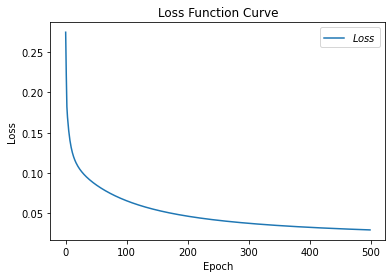

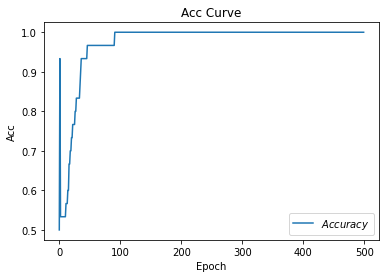

In [ ]:
#绘制loss曲线
plt.title('Loss Function Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(train_loss_results,label='$Loss$')
plt.legend()
plt.show()

#绘制准确度曲线
plt.title('Acc Curve')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.plot(test_acc,label='$Accuracy$')
plt.legend()
plt.show()